In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('classic')

In [3]:
df = pd.read_csv("GooglePlayStore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
missing = df.isna().mean().round(4) * 100
missing.sum()

13.72

In [8]:
df.Type=df.Type.fillna("FREE")

In [9]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
a = df.loc[df["Category"] == "1.9"]
print(a.head())

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [11]:
df=df.drop(10472)

In [12]:
df =df.drop(["Current Ver"], axis =1)

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [14]:
a = df.loc[df["Content Rating"] == "Unrated"]
a.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",2.3.3 and up


In [15]:
df=df.drop(7312)
df=df.drop(8266)

In [16]:
missing = df.isna().mean().round(4) * 100
missing

App                0.00
Category           0.00
Rating            13.59
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.00
Price              0.00
Content Rating     0.00
Genres             0.00
Last Updated       0.00
Android Ver        0.02
dtype: float64

In [17]:
df = df.dropna()#Unrated entries are dropped

In [18]:
missing = df.isna().mean().round(4) * 100
missing

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Android Ver       0.0
dtype: float64

In [19]:
df.shape

(9363, 12)

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [21]:
# Data cleaning for "Installs" column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))
# Data cleaning for "Price" column
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9363 entries, 0 to 10840
Data columns (total 12 columns):
App               9363 non-null object
Category          9363 non-null object
Rating            9363 non-null float64
Reviews           9363 non-null object
Size              9363 non-null object
Installs          9363 non-null object
Type              9363 non-null object
Price             9363 non-null object
Content Rating    9363 non-null object
Genres            9363 non-null object
Last Updated      9363 non-null object
Android Ver       9363 non-null object
dtypes: float64(1), object(11)
memory usage: 950.9+ KB


In [24]:
# Sort by "Category"
df.sort_values("Category", inplace = True)

In [25]:
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [26]:
a = df.loc[df["Size"] == "Varies with device"]
print(a)

                                                    App           Category  \
37                                   Floor Plan Creator     ART_AND_DESIGN   
42                           Textgram - write on photos     ART_AND_DESIGN   
4241                         Textgram - write on photos     ART_AND_DESIGN   
6245                          ZUL - Rotativo Digital BH  AUTO_AND_VEHICLES   
4216                             Ulysse Speedometer Pro  AUTO_AND_VEHICLES   
...                                                 ...                ...   
3649   GO Weather - Widget, Theme, Wallpaper, Efficient            WEATHER   
5512  AccuWeather: Daily Forecast & Live Weather Rep...            WEATHER   
3647                                The Weather Network            WEATHER   
3646  Yahoo! Weather for SH Forecast for understandi...            WEATHER   
3645                           Rainfall radar - weather            WEATHER   

      Rating  Reviews                Size  Installs  Type  Pric

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
34,I Creative Idea,ART_AND_DESIGN,4.7,353,4.2M,10000,Free,0.0,Teen,Art & Design,"April 27, 2018",4.1 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,100000,Free,0.0,Everyone,Art & Design,"July 11, 2018",4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,500000,Free,0.0,Everyone,Art & Design;Creativity,"August 2, 2018",4.4 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",2.3.3 and up


In [28]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Android Ver        object
dtype: object

In [29]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5859
0.0    1319
2.0    1176
5.0     556
3.0     250
1.0     105
6.0      48
7.0      45
8.0       5
Name: Android Ver, dtype: int64

In [30]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Android Ver       float64
dtype: object

In [31]:
df.describe()

,Rating,Reviews,Installs,Price,Android Ver
count,9363.000000,9.363000e+03,9.363000e+03,9363.000000,9363.00000
mean,4.191712,5.142144e+05,1.790317e+07,0.961077,3.21115
std,0.515286,3.144532e+06,9.125227e+07,15.819111,1.54715
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.00000
25%,4.000000,1.860000e+02,1.000000e+04,0.000000,2.00000
50%,4.300000,5.950000e+03,5.000000e+05,0.000000,4.00000
75%,4.500000,8.157850e+04,5.000000e+06,0.000000,4.00000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,8.00000


In [32]:
df.Category.value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

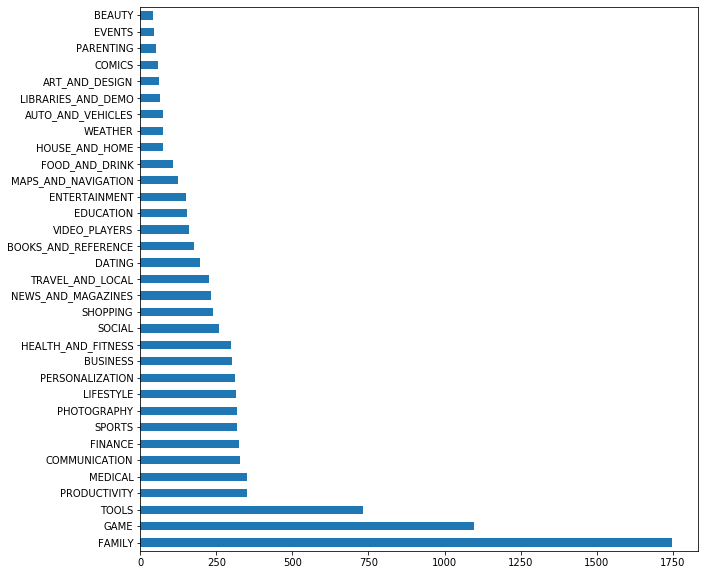

In [33]:
df.Category.value_counts().plot(kind='barh',figsize= (10,10))

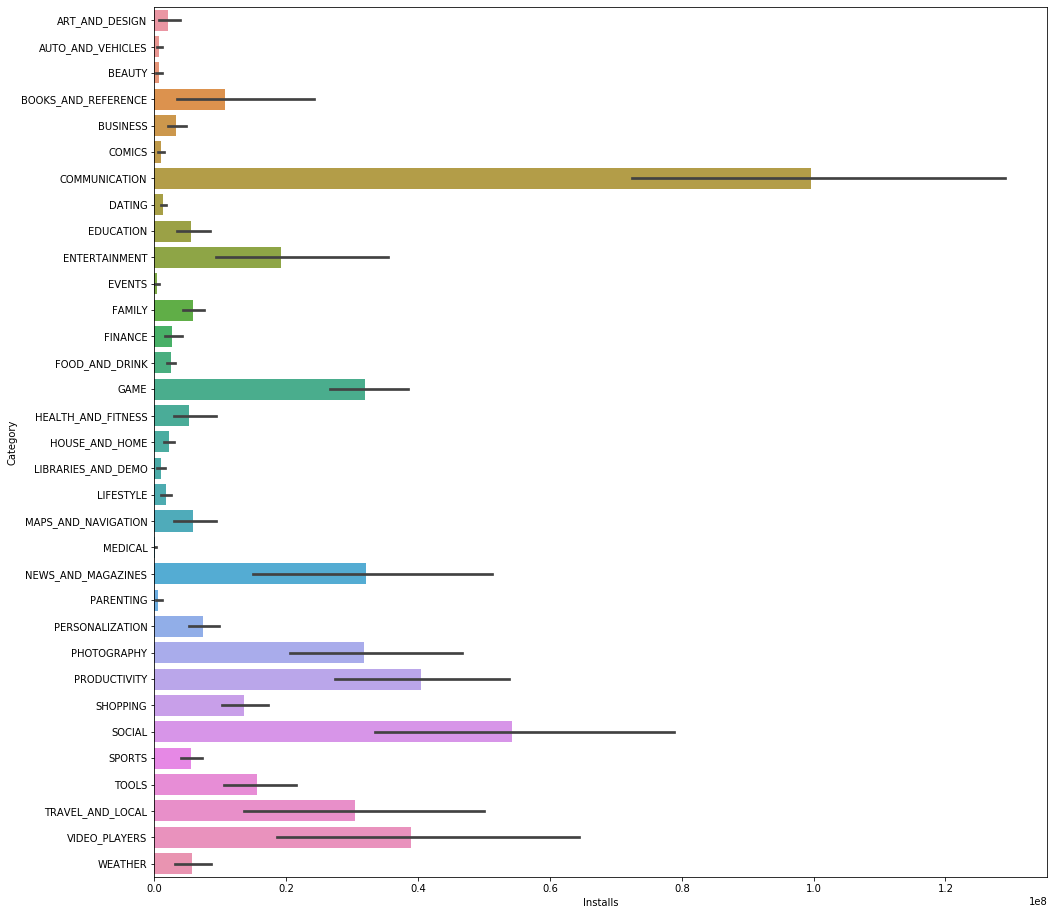

In [34]:
plt.figure(figsize=(16,16))
sns.barplot(x='Installs',y='Category',data=df)

<b>Insight</b> : Maximum Number of Apps belong to the Family and Game Category.

In [35]:
df['Content Rating'].value_counts()

Everyone           7418
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

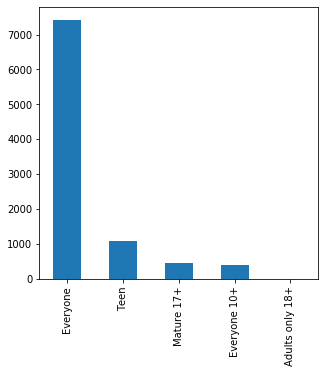

In [36]:
df["Content Rating"].value_counts().plot(kind='bar',figsize= (5,5))

<b>Insight </b>: Majority of the apps are suitable for everyone

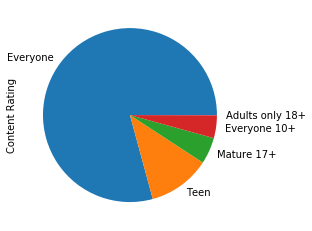

In [37]:
df["Content Rating"].value_counts().plot.pie()

In [38]:
df.Rating.describe()

count    9363.000000
mean        4.191712
std         0.515286
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [39]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  274


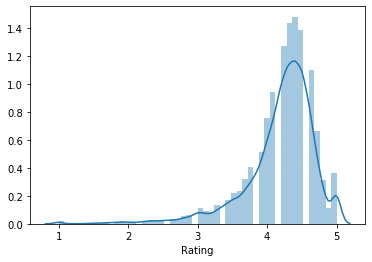

In [40]:
sns.distplot(df.Rating)

<b>Insight</b> : Most of the apps, clearly hold a rating above 4.0 ! And a lot seem to have 5.0 rating

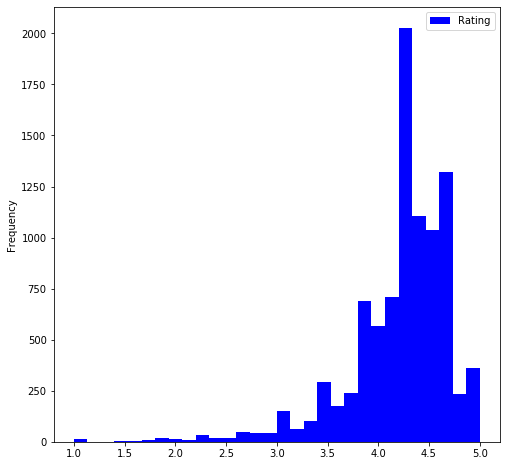

In [41]:
df[["Rating"]].plot(kind="hist",color="blue",figsize=(8,8),bins=30)
plt.show()

In [42]:
df['Reviews'].describe()

count    9.363000e+03
mean     5.142144e+05
std      3.144532e+06
min      1.000000e+00
25%      1.860000e+02
50%      5.950000e+03
75%      8.157850e+04
max      7.815831e+07
Name: Reviews, dtype: float64

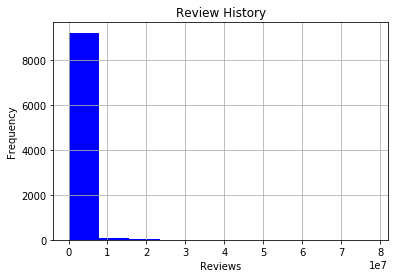

In [43]:
df['Reviews'].hist(histtype='stepfilled', color='blue')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Review History')
plt.show()

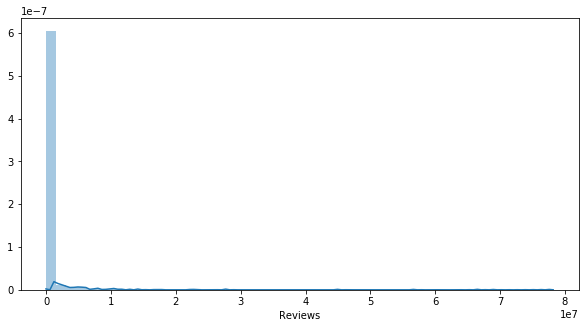

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

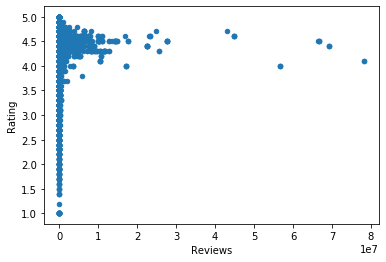

In [45]:
df.plot(kind='scatter',x='Reviews',y='Rating')

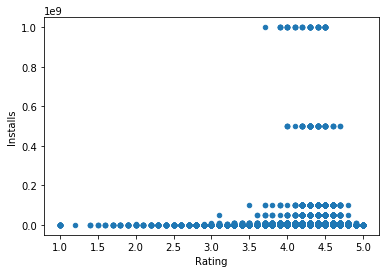

In [46]:
df.plot(kind='scatter',x='Rating',y='Installs')

<b>Insight </b>:Even apps with very less reviews managed to get high ratings.

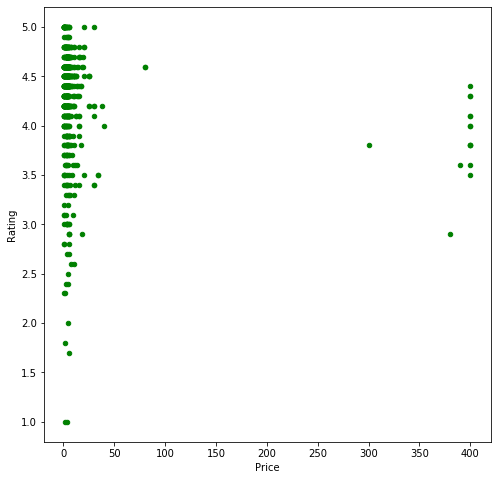

In [47]:
paid_apps = df[df["Price"]!=0]
paid_apps.plot(kind="scatter",x="Price",y="Rating",figsize=(8,8),color="green")
plt.show()

<b>Insight </b>:Many free apps also got good rating.

In [48]:
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",0.0
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",0.0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",0.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",0.0
3986,Clash of Clans,FAMILY,4.6,44881447,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",4.0
1704,Clash of Clans,GAME,4.6,44891723,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",4.0
1670,Clash of Clans,GAME,4.6,44891723,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",4.0
1879,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",4.0


<b>Insight</b> : The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

([<matplotlib.patches.Wedge at 0x1afd7944288>,
 [Text(-1.0742607051820898, 0.23656698269555512, 'Free'),
  Text(1.0742606885703376, -0.23656705813021392, 'Paid')],
 [Text(-0.5859603846447762, 0.12903653601575732, '93.1%'),
  Text(0.5859603755838205, -0.12903657716193487, '6.9%')])

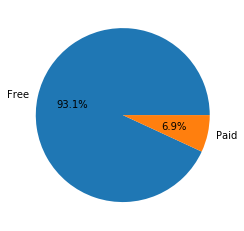

In [49]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

<b>Insight </b> : Majority of the apps are free

In [50]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",4.0


<b>Insight</b> : The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars!


In [51]:
df['Android Ver'].value_counts()

4.0    5859
0.0    1319
2.0    1176
5.0     556
3.0     250
1.0     105
6.0      48
7.0      45
8.0       5
Name: Android Ver, dtype: int64

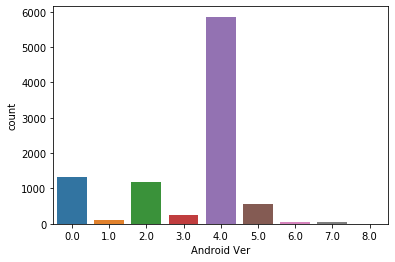

In [52]:
sns.countplot(df['Android Ver'])

<b>Insight</b> : Most of the apps support Android 4.0 and above.


In [53]:
df_full = df[df.Rating == 5]

df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100,Free,0.00,Everyone,Art & Design,"April 18, 2018",4.0
6840,Catholic La Bu Zo Kam,BOOKS_AND_REFERENCE,5.0,23,Varies with device,500,Free,0.00,Everyone,Books & Reference,"March 20, 2016",4.0
5237,Hey AJ! It's Saturday!,BOOKS_AND_REFERENCE,5.0,12,50M,100,Paid,3.99,Everyone,Books & Reference,"June 13, 2016",2.0
8146,CZ-Help,BOOKS_AND_REFERENCE,5.0,2,1.4M,5,Free,0.00,Everyone,Books & Reference,"July 13, 2018",4.0
5763,Tozer Devotional -Series 1,BOOKS_AND_REFERENCE,5.0,5,4.3M,1000,Free,0.00,Everyone,Books & Reference,"October 8, 2016",2.0


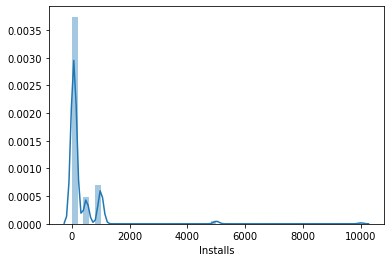

In [54]:
sns.distplot(df_full.Installs)

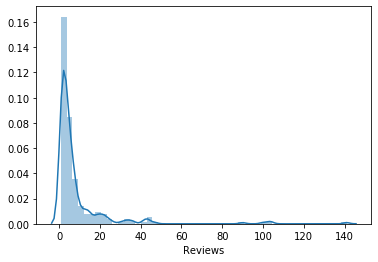

In [55]:
sns.distplot(df_full.Reviews)

The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading.


In [56]:
df_full.Installs.value_counts().sort_index()

1          3
5          8
10        48
50        32
100      114
500       27
1000      38
5000       3
10000      1
Name: Installs, dtype: int64

<b>Insight </b>: There are many Apps that have full ratings but less downloads/installs. So we can't really consider those apps as the best ones.


In [57]:
df_full_maxinstalls = df_full[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,App,Category,Installs
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000
8058,Oración CX,LIFESTYLE,5000
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000


In [58]:
df_full = df_full[df.Reviews > 30]
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


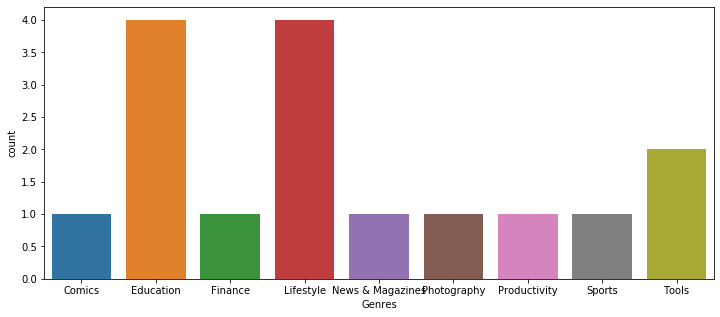

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

<b>Insight</b> : Apps related to Education, LifeStyle and Tools seem to fetch full Ratings with sufficient number of reviews.

In [60]:
x=df["Size"].value_counts()
x

Varies with device    1637
14M                    166
12M                    161
15M                    159
11M                    159
                      ... 
39k                      1
444k                     1
696k                     1
270k                     1
920k                     1
Name: Size, Length: 414, dtype: int64

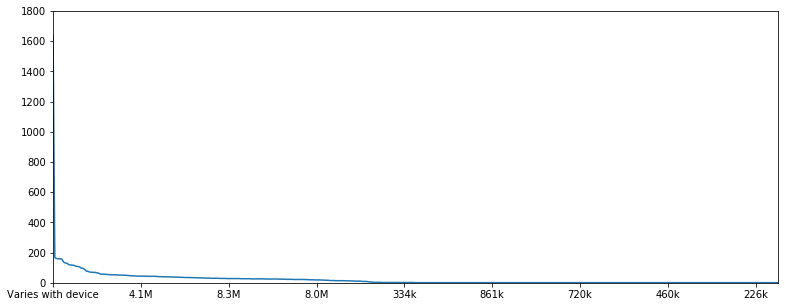

In [61]:
axes = plt.gca()
axes.set_ylim([0,1800])
x.plot(figsize = (13,5))  # plots all columns against index

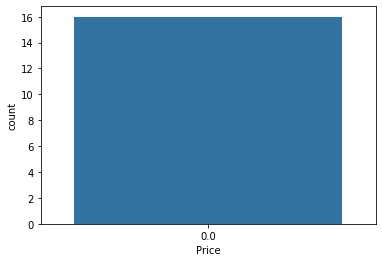

In [62]:
sns.countplot(df_full.Price)

<b>Insight </b>: All the Apps with 5.0 ratings are Free to install.

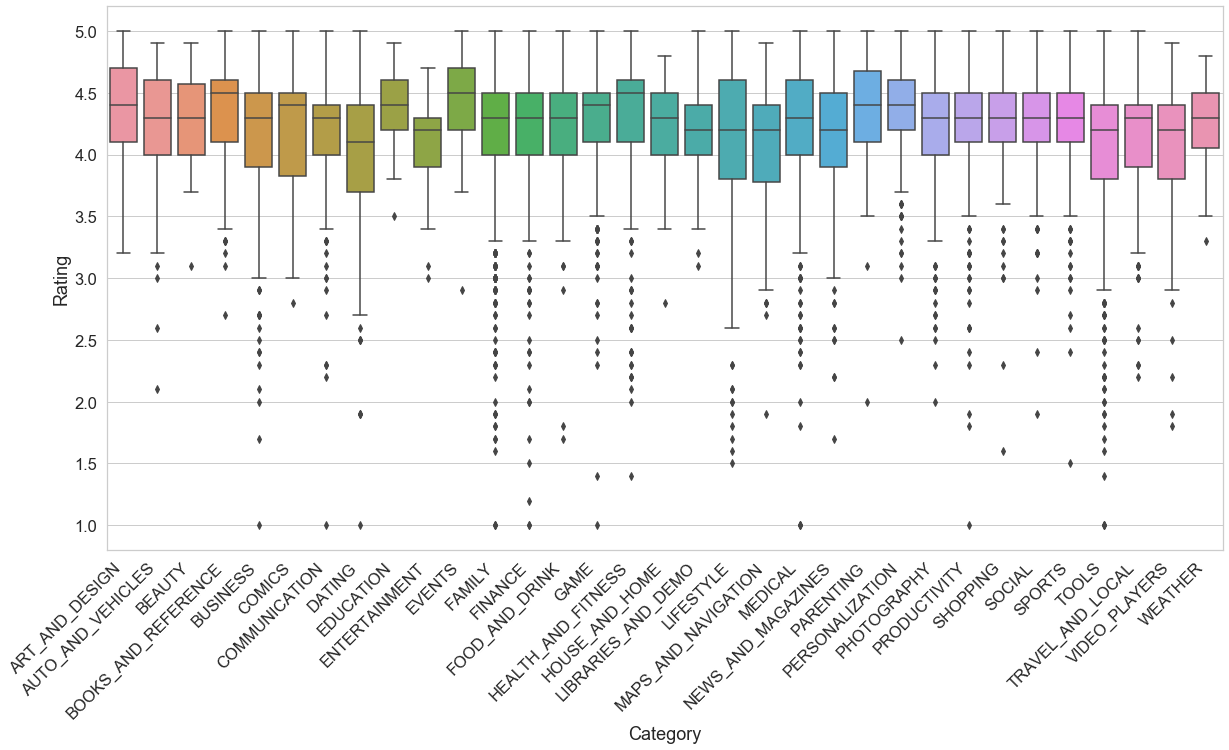

In [63]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')


<b>Insight</b> : This boxplot is useful in comparing the average rating of different categories of apps.In general the average rating lies in the range 4 to 4.5

Text(0.5, 1.0, 'Number of Apps installed based on Content rating')

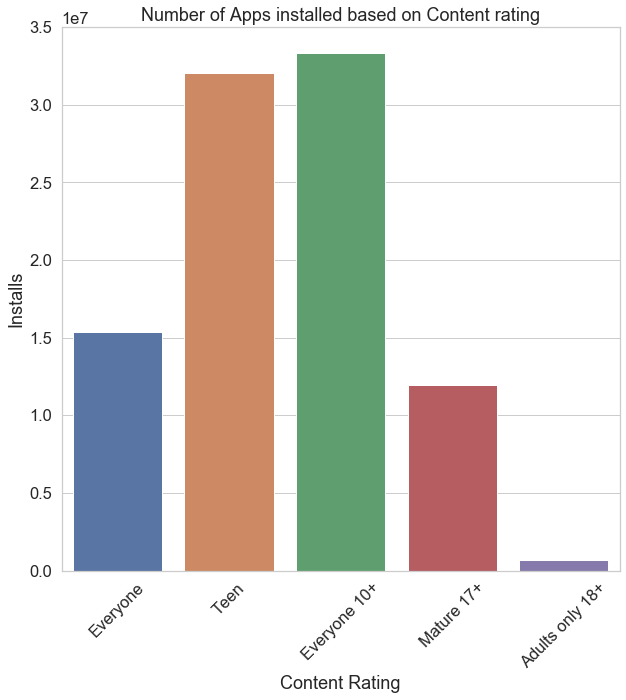

In [64]:
#Apps installed based on Content rating
plt.figure(figsize=(10,10))
sns.barplot(x='Content Rating',y='Installs',data=df,ci=None)
plt.xticks(rotation=45)
plt.title("Number of Apps installed based on Content rating")

In [65]:
print("Normalization")

Normalization


In [66]:
import math 
from math import factorial as fact
from sklearn import preprocessing
# Set charts to view inline
%matplotlib inline

In [67]:
normalized_rating=(df["Rating"]-df["Rating"].mean())/df["Rating"].std()
normalized_rating = pd.DataFrame(normalized_rating)
normalized_rating

,Rating
0,-0.177983
34,0.986419
35,-0.760184
36,0.986419
37,-0.177983
...,...
3646,0.016084
3645,-0.954250
3644,0.016084
3642,0.210151


In [68]:
normalized_rating.describe()

,Rating
count,9.363000e+03
mean,3.134021e-14
std,1.000000e+00
min,-6.194057e+00
25%,-3.720497e-01
50%,2.101511e-01
75%,5.982849e-01
max,1.568619e+00


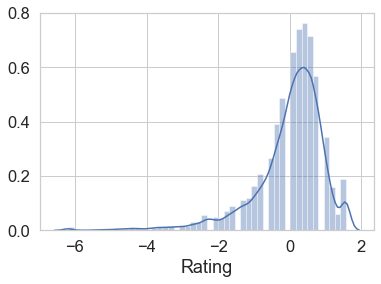

In [69]:
sns.distplot(normalized_rating["Rating"])

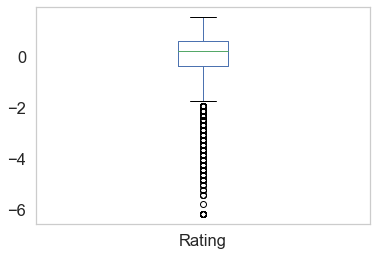

In [70]:
normalized_rating.boxplot(column =['Rating'], grid = False) 

In [71]:
Q1 = normalized_rating.quantile(0.25)
Q3 = normalized_rating.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rating    0.970335
dtype: float64


In [72]:
normalized_rating = normalized_rating[~((normalized_rating < (Q1 - 1.5 * IQR)) |(normalized_rating > (Q3 + 1.5 * IQR))).any(axis=1)]
normalized_rating.shape

(8860, 1)

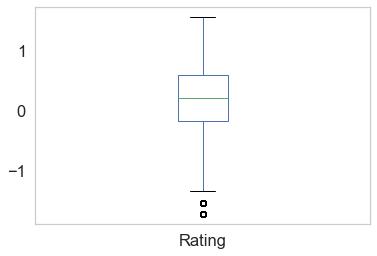

In [73]:
normalized_rating.boxplot(column =['Rating'], grid = False) 

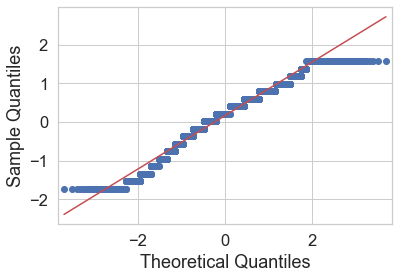

In [74]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(normalized_rating["Rating"],line ='s')
pyplot.show()

<b>Insight</b> : This represents a normal Q-Q plot

In [75]:
normalized_review=(df["Reviews"]-df["Reviews"].mean())/df["Reviews"].std()
normalized_review = pd.DataFrame(normalized_review)
normalized_review

,Reviews
0,-0.163476
34,-0.163414
35,-0.163347
36,-0.160936
37,-0.151875
...,...
3646,-0.161155
3645,-0.154959
3644,-0.157556
3642,-0.157164


In [76]:
normalized_review.describe()

,Reviews
count,9.363000e+03
mean,5.226218e-17
std,1.000000e+00
min,-1.635262e-01
25%,-1.634673e-01
50%,-1.616343e-01
75%,-1.375835e-01
max,2.469178e+01


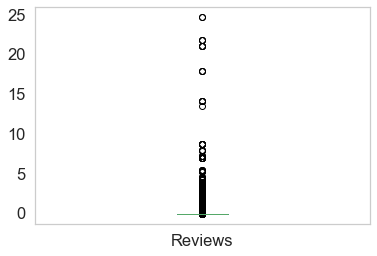

In [77]:
normalized_review.boxplot(column =['Reviews'], grid = False) 

In [78]:
Q1 = normalized_review.quantile(0.25)
Q3 = normalized_review.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Reviews    0.025884
dtype: float64


In [79]:
normalized_review = normalized_review[~((normalized_review < (Q1 - 1.5 * IQR)) |(normalized_review > (Q3 + 1.5 * IQR))).any(axis=1)]
normalized_review.shape

(7729, 1)

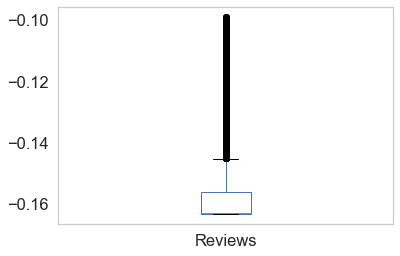

In [80]:
normalized_review.boxplot(column =['Reviews'], grid = False) 

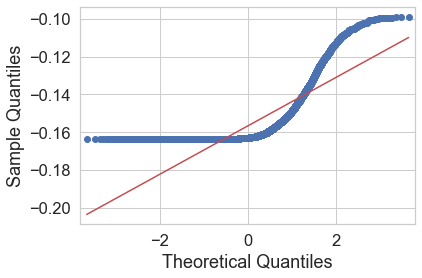

In [81]:
qqplot(normalized_review["Reviews"],line ='s')
pyplot.show()

In [82]:
normalized_install=(df["Installs"]-df["Installs"].mean())/df["Installs"].std()
normalized_install = pd.DataFrame(normalized_install)
normalized_install

,Installs
0,-0.196085
34,-0.196085
35,-0.195098
36,-0.190715
37,-0.141401
...,...
3646,-0.185236
3645,-0.141401
3644,-0.086608
3642,-0.141401


In [83]:
normalized_install.describe()

,Installs
count,9.363000e+03
mean,-4.142378e-16
std,1.000000e+00
min,-1.961942e-01
25%,-1.960847e-01
50%,-1.907149e-01
75%,-1.414011e-01
max,1.076244e+01


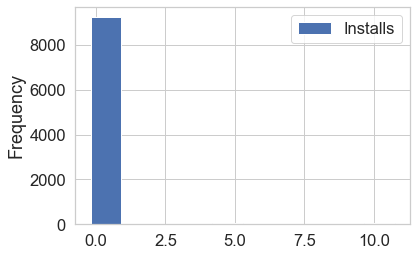

In [84]:
normalized_install.plot(kind ="hist")

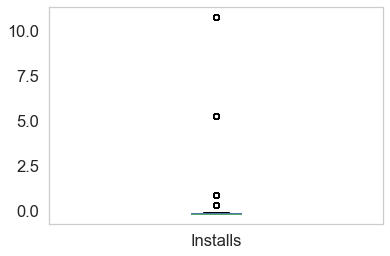

In [85]:
normalized_install.boxplot(column =['Installs'], grid = False) 

In [86]:
normalized_price=(df["Price"]-df["Price"].mean())/df["Price"].std()
normalized_price = pd.DataFrame(normalized_price)
normalized_price

,Price
0,-0.060754
34,-0.060754
35,-0.060754
36,-0.060754
37,-0.060754
...,...
3646,-0.060754
3645,-0.060754
3644,-0.060754
3642,-0.060754


In [87]:
normalized_price.describe()

,Price
count,9.363000e+03
mean,1.499289e-15
std,1.000000e+00
min,-6.075414e-02
25%,-6.075414e-02
50%,-6.075414e-02
75%,-6.075414e-02
max,2.522512e+01


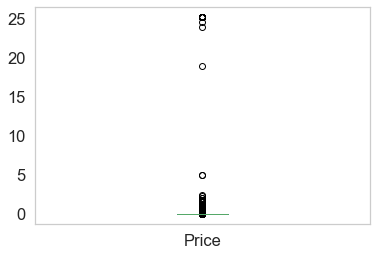

In [88]:
normalized_price.boxplot(column =['Price'], grid = False) 

In [89]:
Q1 = normalized_price.quantile(0.25)
Q3 = normalized_price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Price    0.0
dtype: float64


In [90]:
normalized_price = normalized_price[~((normalized_price < (Q1 - 1.5 * IQR)) |(normalized_price > (Q3 + 1.5 * IQR))).any(axis=1)]
normalized_price.shape

(8717, 1)

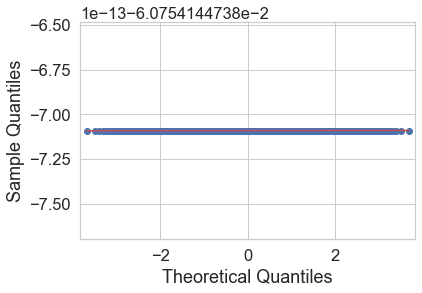

In [91]:
qqplot(normalized_price["Price"],line ='s')
pyplot.show()

In [92]:
print("Hypothesis Testing")

Hypothesis Testing


In [93]:
from math import sqrt
from scipy.stats import norm
import scipy
import random

In [94]:
print("Ho : mean of rating is greater than 4")
print("Ha : mean is less than 4")
mu = 4

Ho : mean of rating is greater than 4
Ha : mean is less than 4


In [95]:
sample= pd.DataFrame(df['Rating'].sample(n=70))
sample_size = 70
sample

,Rating
5653,3.6
2879,4.1
2871,4.1
8098,4.5
3732,4.0
...,...
4770,4.2
2380,4.5
2774,4.4
1011,4.4


In [96]:
sample_mean = sample.Rating.mean()
sample_mean

4.177142857142854

In [97]:
sample_std = sample.Rating.std()
sample_std

0.5259005881071332

In [98]:
alpha = 0.05 #using alpha has 5%

In [99]:
def z_score(mean,std,size,mu):
    z = (mean-mu)/(std/(size**0.5))
    print("the z score is:",z)
    return z
    

In [100]:
z = z_score(sample_mean,sample_std,sample_size,mu)
print("one tailed , left tail")

the z score is: 2.818181818181774
one tailed , left tail


In [101]:
p_values =1- scipy.stats.norm.sf(abs(z)) #one-sided

In [102]:
p_values

0.9975851773720297

In [103]:
norm.cdf(z)

0.9975851773720297

In [104]:
if(p_values < alpha):
    print("Null Hypothesis is rejected")
else:
    print("failed to reject Null Hypothesis")

failed to reject Null Hypothesis


In [127]:
print("H0 :Review mean is less than 5000")
print("H1: Review  mean is greater than 5000")
mu = 5000

H0 :Review mean is less than 5000
H1: Review  mean is greater than 5000


In [128]:
sample= pd.DataFrame(df['Reviews'].sample(n=70))
sample_size = 70
sample

,Reviews
10502,59768
733,1516
5935,181
6822,472
2537,1747
...,...
4292,19047
5619,17945
2135,472584
9829,39


In [129]:
sample_mean = sample.Reviews.mean()
sample_mean

473449.54285714286

In [130]:
sample_std = sample.Reviews.std()
sample_std

1392687.0078482963

In [135]:
z = z_score(sample_mean,sample_std,sample_size,mu)
print("one tailed , right tailed test")

the z score is: 2.8142217508172913
one tailed , right tailed test


In [136]:
p_values =scipy.stats.norm.sf(abs(z)) #one-sided

In [137]:
p_values

0.0024447743274090146

In [138]:
print(alpha)
if(p_values < alpha):
    print("Null Hypothesis is rejected")
else:
    print("failed to reject Null Hypothesis")

0.05
Null Hypothesis is rejected


In [113]:
print("Corelation")

Corelation


In [114]:
df1 = df[['Category', 'Rating','Reviews','Installs','Price','Android Ver','Genres']]

In [115]:
df1.head()

,Category,Rating,Reviews,Installs,Price,Android Ver,Genres
0,ART_AND_DESIGN,4.1,159,10000,0.0,4.0,Art & Design
34,ART_AND_DESIGN,4.7,353,10000,0.0,4.0,Art & Design
35,ART_AND_DESIGN,3.8,564,100000,0.0,4.0,Art & Design
36,ART_AND_DESIGN,4.7,8145,500000,0.0,4.0,Art & Design;Creativity
37,ART_AND_DESIGN,4.1,36639,5000000,0.0,2.0,Art & Design


In [116]:
heatmap1_data = pd.pivot_table(df1, values='Rating', index=['Category'],columns='Installs')

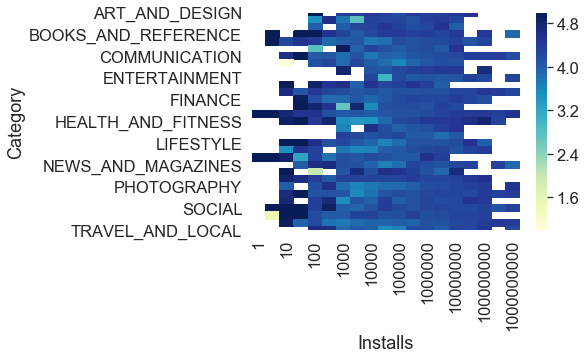

In [117]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [118]:
heatmap1_data = pd.pivot_table(df1, values='Rating', index=['Category'],columns='Android Ver')

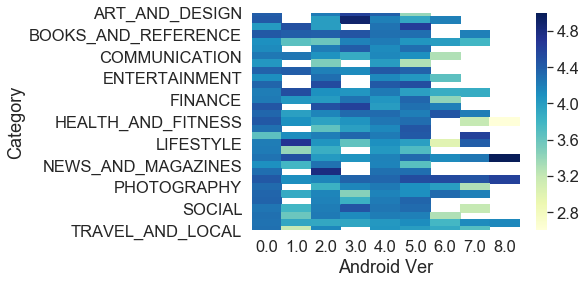

In [119]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [120]:
heatmap1_data = pd.pivot_table(df1, values='Price', index=['Category'],columns='Android Ver')

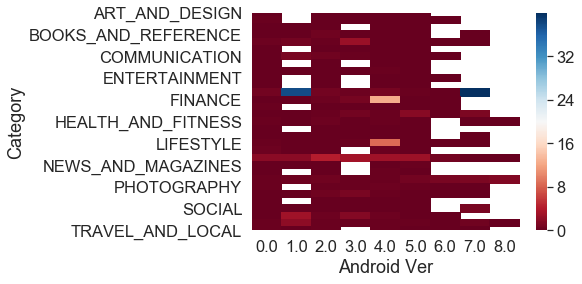

In [121]:
sns.heatmap(heatmap1_data, cmap="RdBu")

In [122]:
df.corr(method="pearson")

,Rating,Reviews,Installs,Price,Android Ver
Rating,1.000000,0.068158,0.051374,-0.021903,-0.026423
Reviews,0.068158,1.000000,0.641609,-0.009821,-0.121346
Installs,0.051374,0.641609,1.000000,-0.011892,-0.186511
Price,-0.021903,-0.009821,-0.011892,1.000000,0.020115
Android Ver,-0.026423,-0.121346,-0.186511,0.020115,1.000000


<b>Insight</b> : Installs and Reviews has the strongest positive correlation among all other parameters.Installs and Android version has negative correlation.



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


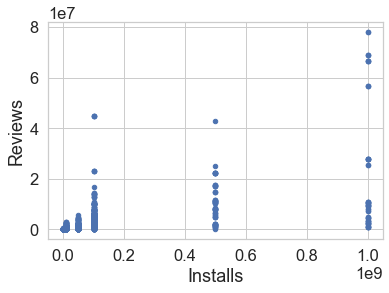

In [123]:
df.plot(kind='scatter',x='Installs',y='Reviews')

In [124]:
from scipy.stats import pearsonr

In [125]:
corr, p_value = pearsonr(df['Installs'], df['Reviews'])

In [126]:
print("Correlation coefficient:",corr.round(3))

Correlation coefficient: 0.642
